In [ ]:
import requests

# Fill these with your app info
CLIENT_ID = ''
CLIENT_SECRET = ''

# Step 1: Get the PIN (user manually logs in)
print("Go to this URL and authorize the app:")
print(f"https://anilist.co/api/v2/oauth/authorize?client_id={CLIENT_ID}&response_type=code")

code = input("\nPaste the code you get after authorizing: ").strip()

# Step 2: Exchange code for access token
token_url = 'https://anilist.co/api/v2/oauth/token'
token_data = {
    'grant_type': 'authorization_code',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
    'code': code,
    'redirect_uri': 'https://anilist.co/api/v2/oauth/pin'
}

token_response = requests.post(token_url, data=token_data)
token_response.raise_for_status()
access_token = token_response.json()['access_token']
print("\nAccess token received!")

# Step 3: Use the access token to get your anime list
api_url = 'https://graphql.anilist.co'
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json',
    'Accept': 'application/json',
}

viewer_query = '''
query {
  Viewer {
    id
    name
  }
}
'''

viewer_response = requests.post(api_url, headers=headers, json={'query': viewer_query})
viewer_response.raise_for_status()
viewer_data = viewer_response.json()

user_id = viewer_data['data']['Viewer']['id']
print(f"Logged in as: {viewer_data['data']['Viewer']['name']} (ID: {user_id})")

anime_query = f'''
query {{
  MediaListCollection(userId: {user_id}, type: ANIME) {{
    lists {{
      name
      entries {{
        media {{
          title {{
            romaji
            english
          }}
          episodes
          duration
          genres
          averageScore
          popularity
          format
          source
          startDate {{
            year
            month
            day
          }}
          endDate {{
            year
            month
            day
          }}
          season
        }}
        status
        score
      }}
    }}
  }}
}}
'''

anime_response = requests.post(api_url, headers=headers, json={'query': anime_query})
anime_response.raise_for_status()
anime_data = anime_response.json()

In [2]:
completed_list = anime_data['data']['MediaListCollection']['lists'][5]['entries']

In [3]:
completed_list[1]

{'media': {'title': {'romaji': 'Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2',
   'english': 'Re:ZERO -Starting Life in Another World- Season 2 Part 2'},
  'episodes': 12,
  'duration': 30,
  'genres': ['Action',
   'Adventure',
   'Drama',
   'Fantasy',
   'Psychological',
   'Romance',
   'Thriller'],
  'averageScore': 84,
  'popularity': 239140,
  'format': 'TV',
  'source': 'LIGHT_NOVEL',
  'startDate': {'year': 2021, 'month': 1, 'day': 6},
  'endDate': {'year': 2021, 'month': 3, 'day': 24},
  'season': 'WINTER'},
 'status': 'COMPLETED',
 'score': 8}

In [4]:
dataset = []
for entry in completed_list:
    row = {
        'title_jp': entry['media']['title']['romaji'],
        'title_en': entry['media']['title']['english'],
        'format': entry['media']['format'],
        'source': entry['media']['source'],
        'release_date': entry['media']['startDate'],
        'end_date': entry['media']['endDate'],
        'season': entry['media']['season'],
        'episodes': entry['media']['episodes'],
        'duration (min)': entry['media']['duration'],
        'genres': entry['media']['genres'],
        'score': entry['score'],
        'average_score': entry['media']['averageScore'],
        'popularity': entry['media']['popularity']
    }
    dataset.append(row)

In [5]:
import pandas as pd

pd.DataFrame(dataset)

,title_jp,title_en,format,source,release_date,end_date,season,episodes,duration (min),genres,score,average_score,popularity
0,Jujutsu Kaisen,JUJUTSU KAISEN,TV,MANGA,"{'year': 2020, 'month': 10, 'day': 3}","{'year': 2021, 'month': 3, 'day': 27}",FALL,24,24,"[Action, Drama, Supernatural]",7.5,85,769775
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,Re:ZERO -Starting Life in Another World- Seaso...,TV,LIGHT_NOVEL,"{'year': 2021, 'month': 1, 'day': 6}","{'year': 2021, 'month': 3, 'day': 24}",WINTER,12,30,"[Action, Adventure, Drama, Fantasy, Psychologi...",8.0,84,239140
2,DAICON IV Opening Animation,None,MOVIE,ORIGINAL,"{'year': 1983, 'month': 8, 'day': 20}","{'year': 1983, 'month': 8, 'day': 20}",SUMMER,1,6,"[Action, Adventure, Mecha, Music, Sci-Fi]",0.0,77,3282
3,Pale Cocoon,Pale Cocoon,OVA,ORIGINAL,"{'year': 2005, 'month': 12, 'day': 10}","{'year': 2005, 'month': 12, 'day': 10}",WINTER,1,23,"[Drama, Sci-Fi]",7.0,68,14768
4,Tori no Uta,Bird's Song; Bird's Poem,OVA,None,"{'year': 2007, 'month': 1, 'day': 30}","{'year': 2007, 'month': 1, 'day': 30}",WINTER,1,34,"[Fantasy, Psychological]",0.0,59,2305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Shingeki no Kyojin 3 Part 2,Attack on Titan Season 3 Part 2,TV,MANGA,"{'year': 2019, 'month': 4, 'day': 29}","{'year': 2019, 'month': 7, 'day': 1}",SPRING,10,24,"[Action, Drama, Fantasy, Mystery]",8.0,89,505805
484,Shingeki no Kyojin: The Final Season,Attack on Titan Final Season,TV,MANGA,"{'year': 2020, 'month': 12, 'day': 7}","{'year': 2021, 'month': 3, 'day': 29}",WINTER,16,24,"[Action, Drama, Fantasy, Mystery]",8.0,86,531511
485,Shingeki no Kyojin: The Final Season Part 2,Attack on Titan Final Season Part 2,TV,MANGA,"{'year': 2022, 'month': 1, 'day': 10}","{'year': 2022, 'month': 4, 'day': 4}",WINTER,12,24,"[Action, Drama, Fantasy, Mystery, Psychological]",8.0,86,344563
486,Shingeki no Kyojin: The Final Season - Kankets...,Attack on Titan Final Season THE FINAL CHAPTER...,SPECIAL,MANGA,"{'year': 2023, 'month': 3, 'day': 4}","{'year': 2023, 'month': 3, 'day': 4}",WINTER,1,61,"[Action, Drama, Fantasy, Mystery, Psychological]",8.0,87,183798


In [7]:
pd.DataFrame(dataset).to_csv('/content/anilist_data.csv', sep=',', index=False)

In [188]:
df = pd.read_csv('/content/anilist_data.csv')
df.head()

,title_jp,title_en,format,source,release_date,end_date,season,episodes,duration (min),genres,score,average_score,popularity
0,Jujutsu Kaisen,JUJUTSU KAISEN,TV,MANGA,"{'year': 2020, 'month': 10, 'day': 3}","{'year': 2021, 'month': 3, 'day': 27}",FALL,24,24,"['Action', 'Drama', 'Supernatural']",7.5,85,769775
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,Re:ZERO -Starting Life in Another World- Seaso...,TV,LIGHT_NOVEL,"{'year': 2021, 'month': 1, 'day': 6}","{'year': 2021, 'month': 3, 'day': 24}",WINTER,12,30,"['Action', 'Adventure', 'Drama', 'Fantasy', 'P...",8.0,84,239140
2,DAICON IV Opening Animation,NaN,MOVIE,ORIGINAL,"{'year': 1983, 'month': 8, 'day': 20}","{'year': 1983, 'month': 8, 'day': 20}",SUMMER,1,6,"['Action', 'Adventure', 'Mecha', 'Music', 'Sci...",0.0,77,3282
3,Pale Cocoon,Pale Cocoon,OVA,ORIGINAL,"{'year': 2005, 'month': 12, 'day': 10}","{'year': 2005, 'month': 12, 'day': 10}",WINTER,1,23,"['Drama', 'Sci-Fi']",7.0,68,14768
4,Tori no Uta,Bird's Song; Bird's Poem,OVA,NaN,"{'year': 2007, 'month': 1, 'day': 30}","{'year': 2007, 'month': 1, 'day': 30}",WINTER,1,34,"['Fantasy', 'Psychological']",0.0,59,2305


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_jp        488 non-null    object 
 1   title_en        457 non-null    object 
 2   format          488 non-null    object 
 3   source          480 non-null    object 
 4   release_date    488 non-null    object 
 5   end_date        488 non-null    object 
 6   season          485 non-null    object 
 7   episodes        488 non-null    int64  
 8   duration (min)  488 non-null    int64  
 9   genres          488 non-null    object 
 10  score           488 non-null    float64
 11  average_score   488 non-null    int64  
 12  popularity      488 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 49.7+ KB


In [190]:
import ast

def convert(obj):
    return ast.literal_eval(obj)

In [191]:
df['release_year'] = df['release_date'].apply(lambda x: convert(x)['year'])
df['release_month'] = df['release_date'].apply(lambda x: convert(x)['month'])
df['release_day'] = df['release_date'].apply(lambda x: convert(x)['day'])
df.head(5)

,title_jp,title_en,format,source,release_date,end_date,season,episodes,duration (min),genres,score,average_score,popularity,release_year,release_month,release_day
0,Jujutsu Kaisen,JUJUTSU KAISEN,TV,MANGA,"{'year': 2020, 'month': 10, 'day': 3}","{'year': 2021, 'month': 3, 'day': 27}",FALL,24,24,"['Action', 'Drama', 'Supernatural']",7.5,85,769775,2020,10.0,3.0
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,Re:ZERO -Starting Life in Another World- Seaso...,TV,LIGHT_NOVEL,"{'year': 2021, 'month': 1, 'day': 6}","{'year': 2021, 'month': 3, 'day': 24}",WINTER,12,30,"['Action', 'Adventure', 'Drama', 'Fantasy', 'P...",8.0,84,239140,2021,1.0,6.0
2,DAICON IV Opening Animation,NaN,MOVIE,ORIGINAL,"{'year': 1983, 'month': 8, 'day': 20}","{'year': 1983, 'month': 8, 'day': 20}",SUMMER,1,6,"['Action', 'Adventure', 'Mecha', 'Music', 'Sci...",0.0,77,3282,1983,8.0,20.0
3,Pale Cocoon,Pale Cocoon,OVA,ORIGINAL,"{'year': 2005, 'month': 12, 'day': 10}","{'year': 2005, 'month': 12, 'day': 10}",WINTER,1,23,"['Drama', 'Sci-Fi']",7.0,68,14768,2005,12.0,10.0
4,Tori no Uta,Bird's Song; Bird's Poem,OVA,NaN,"{'year': 2007, 'month': 1, 'day': 30}","{'year': 2007, 'month': 1, 'day': 30}",WINTER,1,34,"['Fantasy', 'Psychological']",0.0,59,2305,2007,1.0,30.0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_jp        488 non-null    object 
 1   title_en        457 non-null    object 
 2   format          488 non-null    object 
 3   source          480 non-null    object 
 4   release_date    488 non-null    object 
 5   end_date        488 non-null    object 
 6   season          485 non-null    object 
 7   episodes        488 non-null    int64  
 8   duration (min)  488 non-null    int64  
 9   genres          488 non-null    object 
 10  score           488 non-null    float64
 11  average_score   488 non-null    int64  
 12  popularity      488 non-null    int64  
 13  release_year    488 non-null    int64  
 14  release_month   487 non-null    float64
 15  release_day     487 non-null    float64
dtypes: float64(3), int64(5), object(8)
memory usage: 61.1+ KB


In [193]:
df['end_year'] = df['end_date'].apply(lambda x: convert(x)['year'])
df['end_month'] = df['end_date'].apply(lambda x: convert(x)['month'])
df['end_day'] = df['end_date'].apply(lambda x: convert(x)['day'])

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_jp        488 non-null    object 
 1   title_en        457 non-null    object 
 2   format          488 non-null    object 
 3   source          480 non-null    object 
 4   release_date    488 non-null    object 
 5   end_date        488 non-null    object 
 6   season          485 non-null    object 
 7   episodes        488 non-null    int64  
 8   duration (min)  488 non-null    int64  
 9   genres          488 non-null    object 
 10  score           488 non-null    float64
 11  average_score   488 non-null    int64  
 12  popularity      488 non-null    int64  
 13  release_year    488 non-null    int64  
 14  release_month   487 non-null    float64
 15  release_day     487 non-null    float64
 16  end_year        488 non-null    int64  
 17  end_month       487 non-null    flo

In [195]:
df[df['source'].isna()]

,title_jp,title_en,format,source,release_date,end_date,season,episodes,duration (min),genres,score,average_score,popularity,release_year,release_month,release_day,end_year,end_month,end_day
4,Tori no Uta,Bird's Song; Bird's Poem,OVA,NaN,"{'year': 2007, 'month': 1, 'day': 30}","{'year': 2007, 'month': 1, 'day': 30}",WINTER,1,34,"['Fantasy', 'Psychological']",0.0,59,2305,2007,1.0,30.0,2007,1.0,30.0
8,1001 Nights,NaN,MOVIE,NaN,"{'year': 1999, 'month': 4, 'day': 24}","{'year': 1999, 'month': 4, 'day': 24}",SPRING,1,24,"['Fantasy', 'Romance']",0.0,62,7415,1999,4.0,24.0,1999,4.0,24.0
15,a piece of PHANTASMAGORIA,NaN,OVA,NaN,"{'year': 1995, 'month': None, 'day': None}","{'year': 1995, 'month': None, 'day': None}",NaN,15,5,['Fantasy'],0.0,58,2143,1995,NaN,NaN,1995,NaN,NaN
51,Bara no Hana to Joe,NaN,MOVIE,NaN,"{'year': 1977, 'month': 3, 'day': 16}","{'year': 1977, 'month': 3, 'day': 16}",SPRING,1,20,['Drama'],6.0,50,654,1977,3.0,16.0,1977,3.0,16.0
121,Fantascope Tylostoma,Fantascope Tylostoma,OVA,NaN,"{'year': 2006, 'month': 8, 'day': 1}","{'year': 2006, 'month': 8, 'day': 1}",SUMMER,1,34,['Supernatural'],0.0,66,2324,2006,8.0,1.0,2006,8.0,1.0
138,Ginga no Uo: URSA minor BLUE,NaN,OVA,NaN,"{'year': 1993, 'month': 5, 'day': 21}","{'year': 1993, 'month': 5, 'day': 21}",SPRING,1,23,['Fantasy'],0.0,61,1605,1993,5.0,21.0,1993,5.0,21.0
215,Kick-Heart,NaN,MOVIE,NaN,"{'year': 2013, 'month': 5, 'day': 26}","{'year': 2013, 'month': 5, 'day': 26}",SPRING,1,12,"['Comedy', 'Romance', 'Sports']",7.0,62,7650,2013,5.0,26.0,2013,5.0,26.0
278,Miyamoto Musashi: Souken ni Haseru Yume,Musashi: The Dream of the Last Samurai,MOVIE,NaN,"{'year': 2009, 'month': 6, 'day': 13}","{'year': 2009, 'month': 6, 'day': 13}",SUMMER,1,72,['Action'],8.0,56,1768,2009,6.0,13.0,2009,6.0,13.0


In [196]:
df[df['season'].isna()]

,title_jp,title_en,format,source,release_date,end_date,season,episodes,duration (min),genres,score,average_score,popularity,release_year,release_month,release_day,end_year,end_month,end_day
15,a piece of PHANTASMAGORIA,NaN,OVA,NaN,"{'year': 1995, 'month': None, 'day': None}","{'year': 1995, 'month': None, 'day': None}",NaN,15,5,['Fantasy'],0.0,58,2143,1995,NaN,NaN,1995,NaN,NaN
135,Genshiken Nidaime no Roku,Genshiken Second Generation OVA,OVA,MANGA,"{'year': 2013, 'month': 12, 'day': 20}","{'year': 2013, 'month': 12, 'day': 20}",NaN,1,23,"['Comedy', 'Slice of Life']",7.0,69,5140,2013,12.0,20.0,2013,12.0,20.0
479,Shiguang Dailiren,Link Click,ONA,ORIGINAL,"{'year': 2021, 'month': 4, 'day': 30}","{'year': 2021, 'month': 7, 'day': 9}",NaN,11,24,"['Drama', 'Mystery', 'Supernatural', 'Thriller']",8.0,86,132167,2021,4.0,30.0,2021,7.0,9.0


In [197]:
df.drop('release_date', axis=1, inplace=True)
df.drop('end_date', axis=1, inplace=True)
df.drop('title_en', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_jp        488 non-null    object 
 1   format          488 non-null    object 
 2   source          480 non-null    object 
 3   season          485 non-null    object 
 4   episodes        488 non-null    int64  
 5   duration (min)  488 non-null    int64  
 6   genres          488 non-null    object 
 7   score           488 non-null    float64
 8   average_score   488 non-null    int64  
 9   popularity      488 non-null    int64  
 10  release_year    488 non-null    int64  
 11  release_month   487 non-null    float64
 12  release_day     487 non-null    float64
 13  end_year        488 non-null    int64  
 14  end_month       487 non-null    float64
 15  end_day         487 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 61.1+ KB


In [198]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 487
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_jp        478 non-null    object 
 1   format          478 non-null    object 
 2   source          478 non-null    object 
 3   season          478 non-null    object 
 4   episodes        478 non-null    int64  
 5   duration (min)  478 non-null    int64  
 6   genres          478 non-null    object 
 7   score           478 non-null    float64
 8   average_score   478 non-null    int64  
 9   popularity      478 non-null    int64  
 10  release_year    478 non-null    int64  
 11  release_month   478 non-null    float64
 12  release_day     478 non-null    float64
 13  end_year        478 non-null    int64  
 14  end_month       478 non-null    float64
 15  end_day         478 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 63.5+ KB


In [199]:
df.dropna(inplace=True)
df.head()

,title_jp,format,source,season,episodes,duration (min),genres,score,average_score,popularity,release_year,release_month,release_day,end_year,end_month,end_day
0,Jujutsu Kaisen,TV,MANGA,FALL,24,24,"['Action', 'Drama', 'Supernatural']",7.5,85,769775,2020,10.0,3.0,2021,3.0,27.0
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,TV,LIGHT_NOVEL,WINTER,12,30,"['Action', 'Adventure', 'Drama', 'Fantasy', 'P...",8.0,84,239140,2021,1.0,6.0,2021,3.0,24.0
2,DAICON IV Opening Animation,MOVIE,ORIGINAL,SUMMER,1,6,"['Action', 'Adventure', 'Mecha', 'Music', 'Sci...",0.0,77,3282,1983,8.0,20.0,1983,8.0,20.0
3,Pale Cocoon,OVA,ORIGINAL,WINTER,1,23,"['Drama', 'Sci-Fi']",7.0,68,14768,2005,12.0,10.0,2005,12.0,10.0
5,EUREKA: Koukyoushihen Eureka Seven Hi-Evolution,MOVIE,ORIGINAL,FALL,1,116,"['Action', 'Adventure', 'Drama', 'Mecha', 'Sci...",7.0,61,4281,2021,11.0,26.0,2021,11.0,26.0


In [200]:
df_genres = df['genres']

In [201]:
df['genres'] = df['genres'].str.replace('[', '')
df['genres'] = df['genres'].str.replace(']', '')
df['genres'] = df['genres'].str.replace("'", '')
df['genres'] = df['genres'].str.replace(' ', '')
df.head()

,title_jp,format,source,season,episodes,duration (min),genres,score,average_score,popularity,release_year,release_month,release_day,end_year,end_month,end_day
0,Jujutsu Kaisen,TV,MANGA,FALL,24,24,"Action,Drama,Supernatural",7.5,85,769775,2020,10.0,3.0,2021,3.0,27.0
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,TV,LIGHT_NOVEL,WINTER,12,30,"Action,Adventure,Drama,Fantasy,Psychological,R...",8.0,84,239140,2021,1.0,6.0,2021,3.0,24.0
2,DAICON IV Opening Animation,MOVIE,ORIGINAL,SUMMER,1,6,"Action,Adventure,Mecha,Music,Sci-Fi",0.0,77,3282,1983,8.0,20.0,1983,8.0,20.0
3,Pale Cocoon,OVA,ORIGINAL,WINTER,1,23,"Drama,Sci-Fi",7.0,68,14768,2005,12.0,10.0,2005,12.0,10.0
5,EUREKA: Koukyoushihen Eureka Seven Hi-Evolution,MOVIE,ORIGINAL,FALL,1,116,"Action,Adventure,Drama,Mecha,Sci-Fi",7.0,61,4281,2021,11.0,26.0,2021,11.0,26.0


In [202]:
binarized_genres = df['genres'].str.get_dummies(sep=',')

In [203]:
for genre in binarized_genres.columns:
    df[genre] = binarized_genres[genre]

In [204]:
df.drop('genres', axis=1, inplace=True)

In [205]:
df['release_month'] = df['release_month'].astype(int)
df['release_day'] = df['release_day'].astype(int)

df['end_month'] = df['end_month'].astype(int)
df['end_day'] = df['end_day'].astype(int)

In [206]:
df['decade'] = df['release_year']//10*10

In [207]:
df['average_score'] = df['average_score']/10

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 487
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_jp        478 non-null    object 
 1   format          478 non-null    object 
 2   source          478 non-null    object 
 3   season          478 non-null    object 
 4   episodes        478 non-null    int64  
 5   duration (min)  478 non-null    int64  
 6   score           478 non-null    float64
 7   average_score   478 non-null    float64
 8   popularity      478 non-null    int64  
 9   release_year    478 non-null    int64  
 10  release_month   478 non-null    int64  
 11  release_day     478 non-null    int64  
 12  end_year        478 non-null    int64  
 13  end_month       478 non-null    int64  
 14  end_day         478 non-null    int64  
 15  Action          478 non-null    int64  
 16  Adventure       478 non-null    int64  
 17  Comedy          478 non-null    int64  


In [209]:
df.head()

,title_jp,format,source,season,episodes,duration (min),score,average_score,popularity,release_year,...,Music,Mystery,Psychological,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Thriller,decade
0,Jujutsu Kaisen,TV,MANGA,FALL,24,24,7.5,8.5,769775,2020,...,0,0,0,0,0,0,0,1,0,2020
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,TV,LIGHT_NOVEL,WINTER,12,30,8.0,8.4,239140,2021,...,0,0,1,1,0,0,0,0,1,2020
2,DAICON IV Opening Animation,MOVIE,ORIGINAL,SUMMER,1,6,0.0,7.7,3282,1983,...,1,0,0,0,1,0,0,0,0,1980
3,Pale Cocoon,OVA,ORIGINAL,WINTER,1,23,7.0,6.8,14768,2005,...,0,0,0,0,1,0,0,0,0,2000
5,EUREKA: Koukyoushihen Eureka Seven Hi-Evolution,MOVIE,ORIGINAL,FALL,1,116,7.0,6.1,4281,2021,...,0,0,0,0,1,0,0,0,0,2020


In [171]:
df.to_csv('/content/filtered_anilist_data.csv', sep=',', index=False)

In [210]:
df_exploded = df
df_exploded['genres'] = df_genres.apply(lambda x: ast.literal_eval(x))
df_exploded = df.explode('genres')
df_exploded.head()

,title_jp,format,source,season,episodes,duration (min),score,average_score,popularity,release_year,...,Mystery,Psychological,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Thriller,decade,genres
0,Jujutsu Kaisen,TV,MANGA,FALL,24,24,7.5,8.5,769775,2020,...,0,0,0,0,0,0,1,0,2020,Action
0,Jujutsu Kaisen,TV,MANGA,FALL,24,24,7.5,8.5,769775,2020,...,0,0,0,0,0,0,1,0,2020,Drama
0,Jujutsu Kaisen,TV,MANGA,FALL,24,24,7.5,8.5,769775,2020,...,0,0,0,0,0,0,1,0,2020,Supernatural
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,TV,LIGHT_NOVEL,WINTER,12,30,8.0,8.4,239140,2021,...,0,1,1,0,0,0,0,1,2020,Action
1,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,TV,LIGHT_NOVEL,WINTER,12,30,8.0,8.4,239140,2021,...,0,1,1,0,0,0,0,1,2020,Adventure


In [172]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [86]:
total_time = df['duration (min)'].sum()
days = int(total_time/(60*24))
hours = int((total_time % (60*24))/60)
minutes = int(total_time % 60)
print(f'Total time spent: {days} days, {hours} hours and {minutes} minutes')

Total time spent: 11 days, 14 hours and 45 minutes


In [88]:
df.groupby('season').count()

,title_jp,format,source,episodes,duration (min),score,average_score,popularity,release_year,release_month,...,Mecha,Music,Mystery,Psychological,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Thriller
season,,,,,,,,,,,,,,,,,,,,,
FALL,136,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
SPRING,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
SUMMER,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
WINTER,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101


In [89]:
df.groupby('season').agg({'score': 'mean'})

,score
season,
FALL,7.341912
SPRING,7.408759
SUMMER,7.336538
WINTER,7.534653


In [92]:
binarized_genres.sum().sort_values(ascending=False).head(5)

,0
Romance,247
Drama,239
Action,204
Comedy,203
Fantasy,133


In [100]:
df.groupby('format').count()['title_jp'].sort_values(ascending=False)

,title_jp
format,
TV,349
MOVIE,76
OVA,32
TV_SHORT,11
ONA,6
SPECIAL,4


In [124]:
df.groupby('format').agg({'score': 'mean', 'average_score': 'mean'}).sort_values(by='score', ascending=False)

,score,average_score
format,,
SPECIAL,7.750000,7.550000
TV,7.489971,7.410888
MOVIE,7.427632,7.615789
OVA,6.937500,7.093750
ONA,6.666667,7.000000
TV_SHORT,6.000000,6.418182


In [117]:
df.groupby('source')['title_jp'].count().sort_values(ascending=False)

,title_jp
source,
MANGA,219
LIGHT_NOVEL,113
ORIGINAL,88
OTHER,44
VISUAL_NOVEL,13
VIDEO_GAME,1


In [127]:
df[df['source'] == 'VIDEO_GAME']

,title_jp,format,source,season,episodes,duration (min),score,average_score,popularity,release_year,...,Music,Mystery,Psychological,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Thriller,decade
365,Senjou no Valkyria: Gallian Chronicles,TV,VIDEO_GAME,SPRING,26,24,7.0,7.3,20421,2009,...,0,0,0,1,0,0,0,0,0,2000


In [123]:
df.groupby('source').agg({'score': 'mean', 'average_score': 'mean'}).sort_values(by='score', ascending=False)

,score,average_score
source,,
MANGA,7.598174,7.435616
ORIGINAL,7.306818,7.486364
LIGHT_NOVEL,7.269912,7.325664
OTHER,7.136364,7.370455
VIDEO_GAME,7.000000,7.300000
VISUAL_NOVEL,6.769231,6.800000


In [113]:
df.groupby('decade')['title_jp'].count().sort_values(ascending=False)

,title_jp
decade,
2010,239
2000,98
2020,78
1980,30
1990,28
1970,5


In [128]:
df.groupby('decade').agg({'score': 'mean', 'average_score': 'mean'}).sort_values(by='score', ascending=False)

,score,average_score
decade,,
1990,7.642857,7.439286
2000,7.576531,7.412245
2010,7.497908,7.385356
2020,7.179487,7.488462
1980,6.566667,7.140000
1970,6.400000,7.380000


In [212]:
df_exploded.groupby('genres').agg({'score': 'mean', 'average_score': 'mean'}).sort_values(by='score', ascending=False)

,score,average_score
genres,,
Sports,8.142857,7.228571
Thriller,8.129630,7.937037
Mahou Shoujo,7.900000,7.640000
Psychological,7.764706,7.766176
Mystery,7.643750,7.690000
Slice of Life,7.641732,7.444094
Drama,7.638075,7.576569
Supernatural,7.433962,7.628302
Comedy,7.421182,7.292118


In [222]:
df_exploded.groupby(by=['genres', 'source']).agg({'score': 'mean', 'average_score': 'mean', 'title_jp': 'count'})

score  average_score  title_jp
genres   source                                         
Action   LIGHT_NOVEL   7.000000       7.139655        58
         MANGA         7.636364       7.689610        77
         ORIGINAL      7.467391       7.578261        46
         OTHER         7.047619       7.347619        21
         VIDEO_GAME    7.000000       7.300000         1
...                         ...            ...       ...
Thriller LIGHT_NOVEL   7.750000       7.750000         4
         MANGA         9.500000       8.000000         2
         ORIGINAL      8.045455       8.045455        11
         OTHER         8.000000       7.766667         9
         VISUAL_NOVEL  9.000000       8.900000         1

[79 rows x 3 columns]

In [266]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

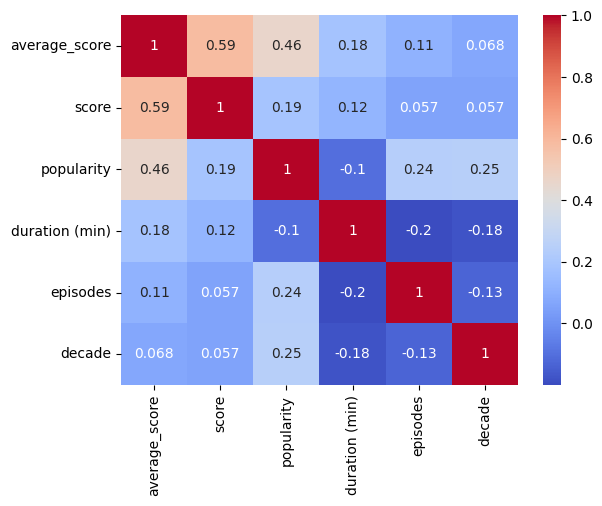

In [267]:
sns.heatmap(df[['average_score', 'score', 'popularity', 'duration (min)', 'episodes', 'decade']].corr(), annot=True, cmap='coolwarm')
plt.show()

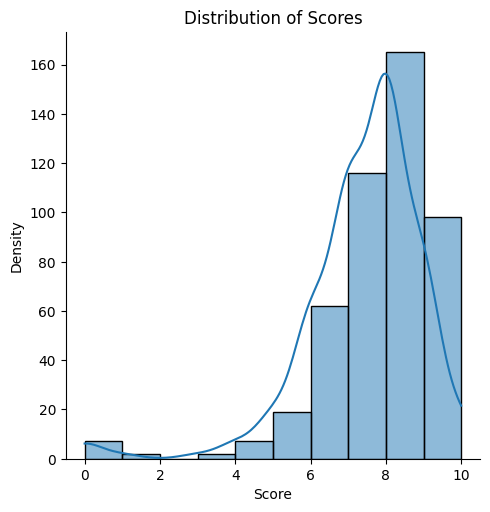

In [292]:
sns.displot(data=df, x='score', kde=True, bins=10)
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of Scores')
plt.show()

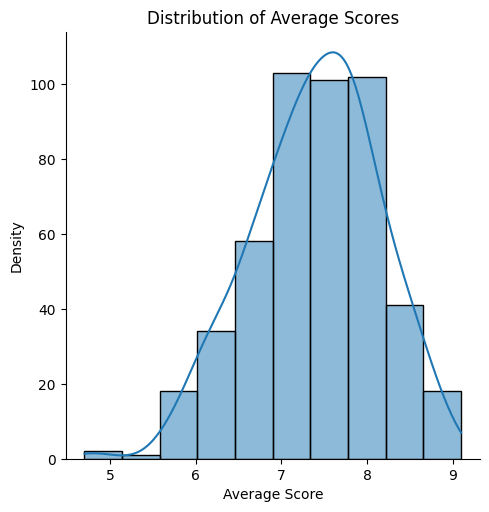

In [293]:
sns.displot(data=df, x='average_score', kde=True, bins=10)
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.title('Distribution of Average Scores')
plt.show()

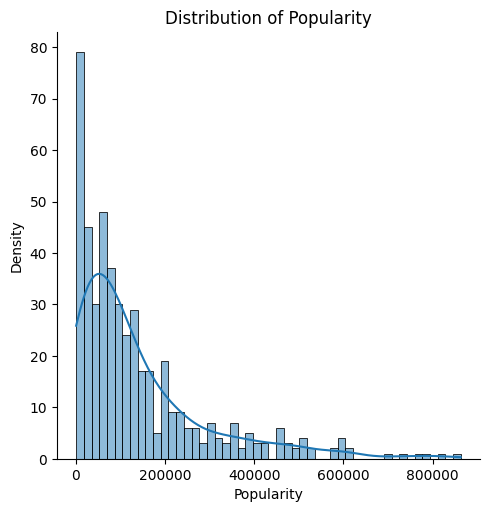

In [294]:
sns.displot(data=df, x='popularity', kde=True, bins=50)
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Distribution of Popularity')
plt.show()

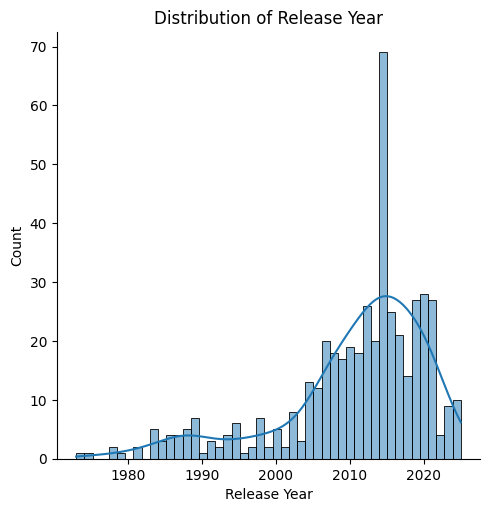

In [307]:
sns.displot(data=df, x='release_year', bins=len(df['release_year'].unique()), kde=True)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Year')
plt.show()

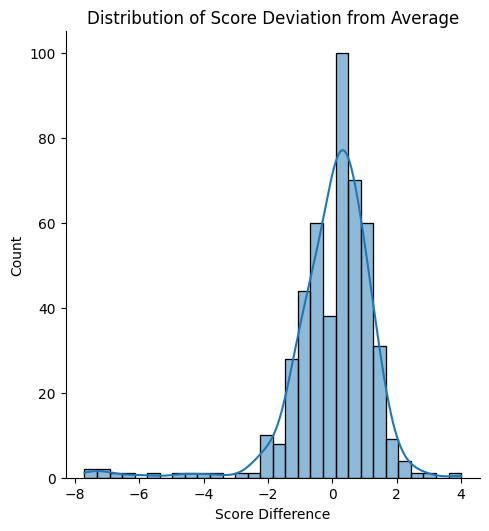

In [330]:
deviation = df['score'] - df['average_score']

sns.displot(data=deviation, kde=True, bins=30)
plt.xlabel('Score Difference')
plt.ylabel('Count')
plt.title('Distribution of Score Deviation from Average')
plt.show()

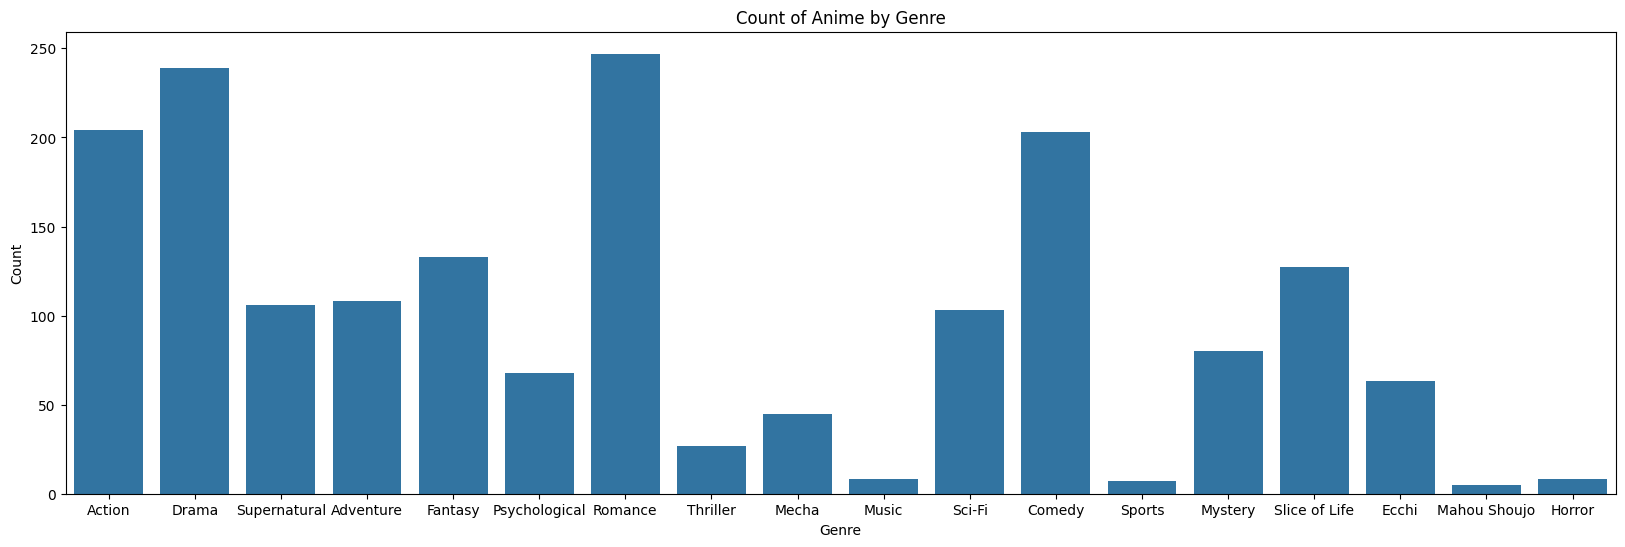

In [296]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_exploded, x='genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Anime by Genre')
plt.show()

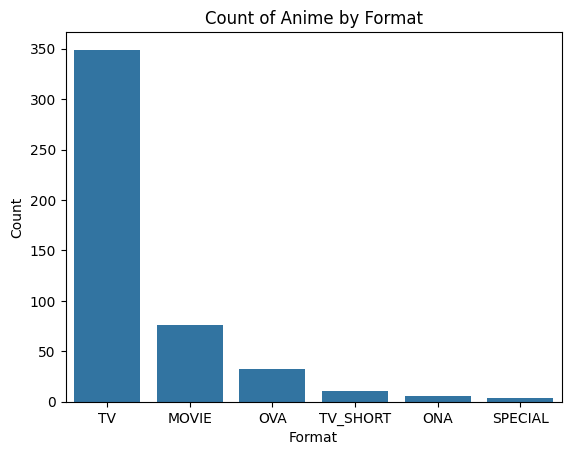

In [299]:
sns.countplot(data=df, x='format')
plt.xlabel('Format')
plt.ylabel('Count')
plt.title('Count of Anime by Format')
plt.show()

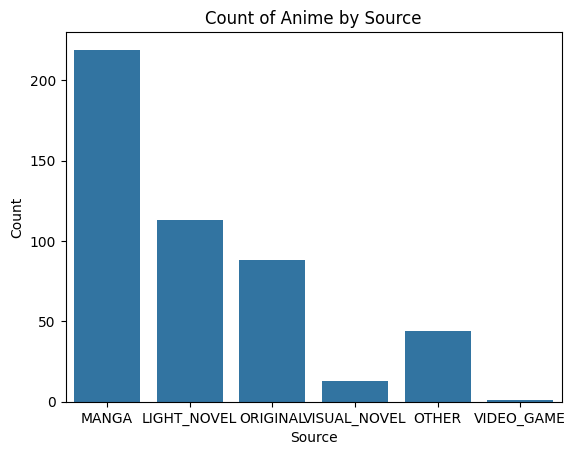

In [300]:
sns.countplot(data=df, x='source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Count of Anime by Source')
plt.show()

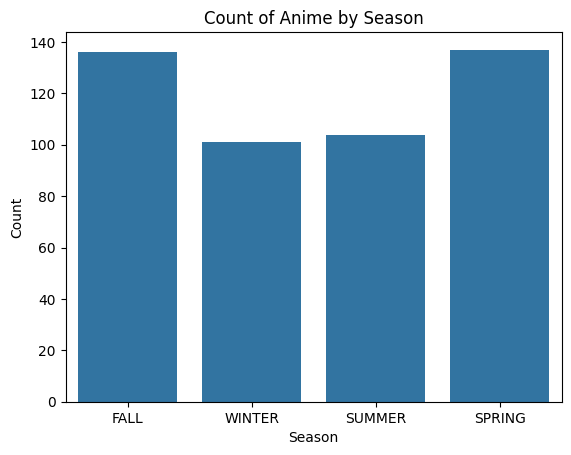

In [301]:
sns.countplot(data=df, x='season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Anime by Season')
plt.show()

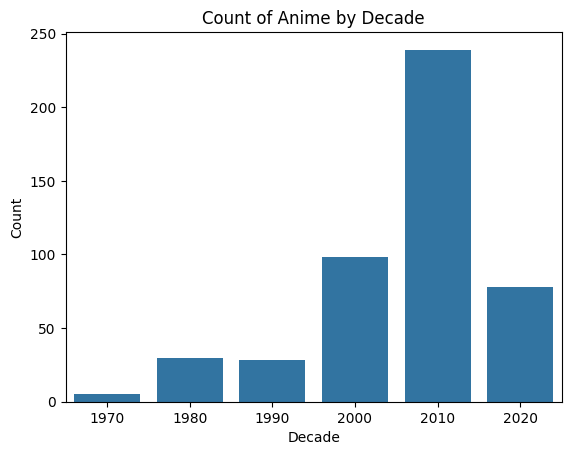

In [302]:
sns.countplot(data=df, x='decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Count of Anime by Decade')
plt.show()

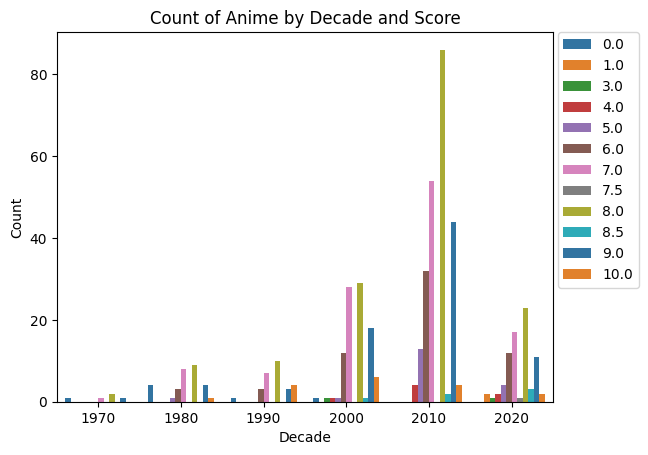

In [313]:
sns.countplot(data=df, x='decade', hue='score', palette='tab10')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Count of Anime by Decade and Score')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.show()

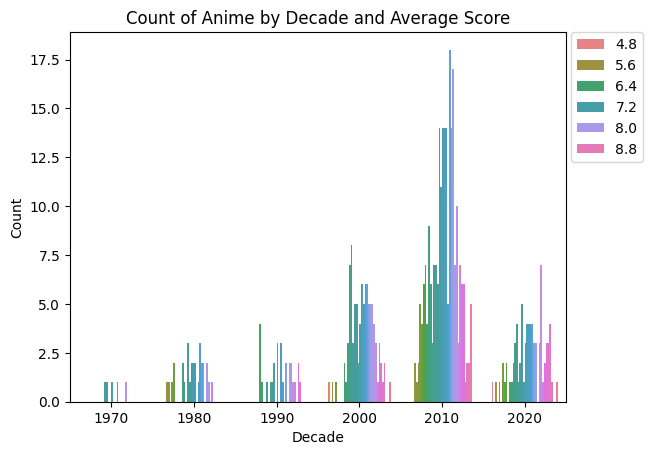

In [312]:
sns.countplot(data=df, x='decade', hue='average_score', palette='husl')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Count of Anime by Decade and Average Score')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.show()

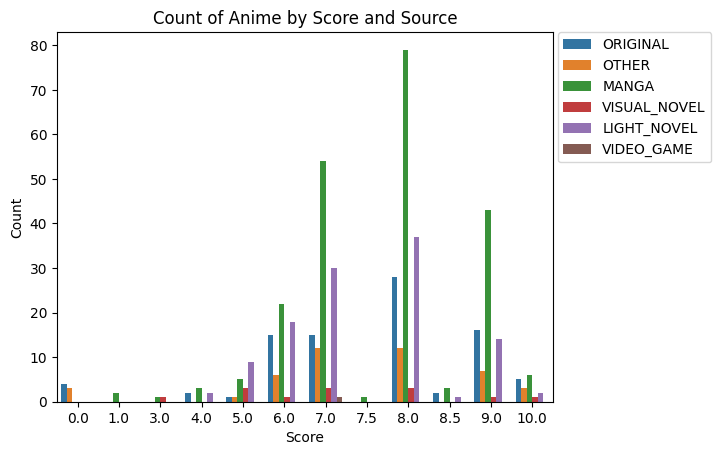

In [311]:
sns.countplot(data=df, x='score', hue='source', palette='tab10')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Anime by Score and Source')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.show()

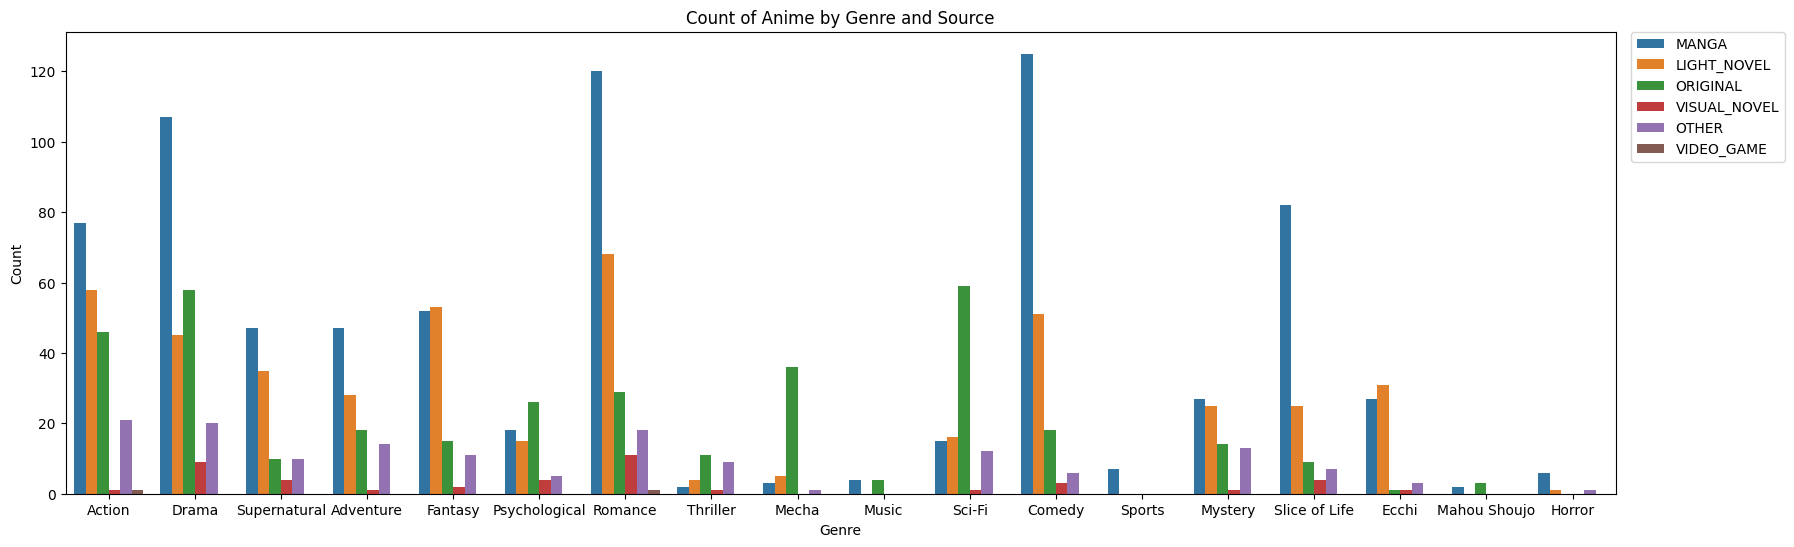

In [314]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_exploded, x='genres', hue='source', palette='tab10')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Anime by Genre and Source')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.show()

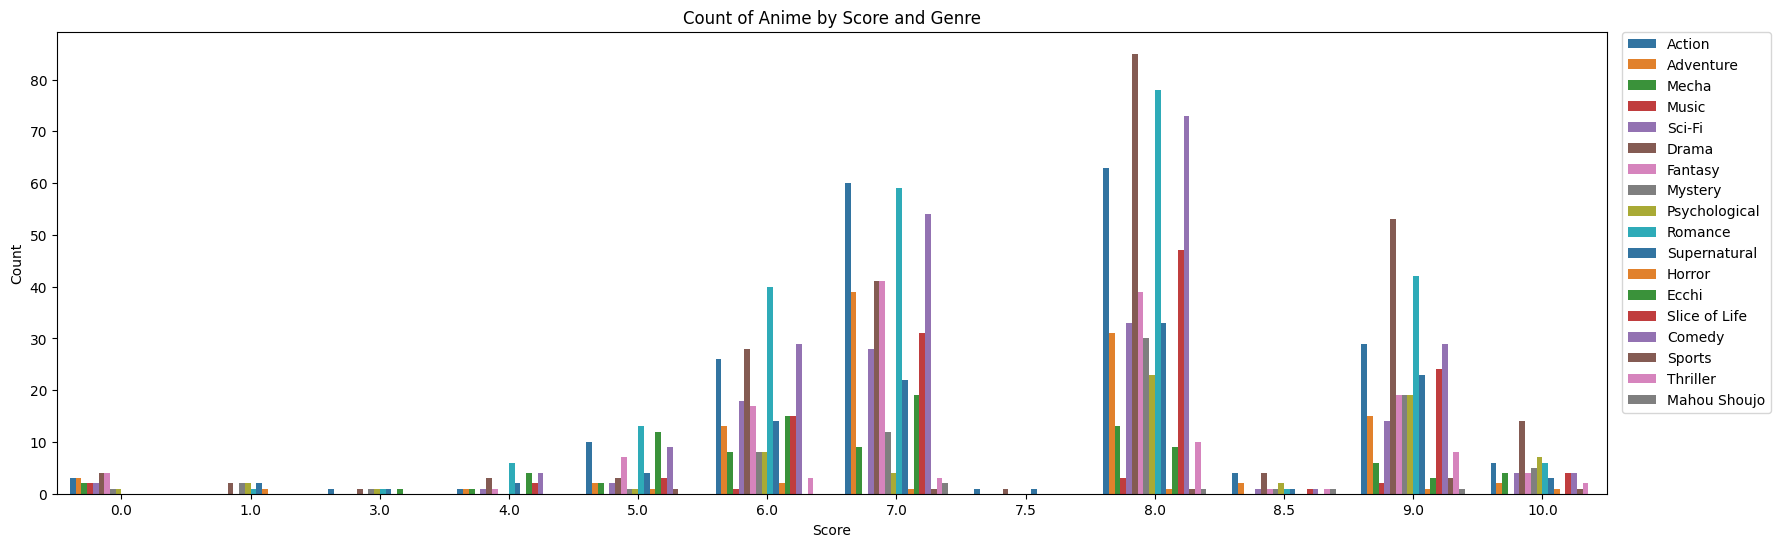

In [316]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_exploded, x='score', hue='genres', palette='tab10')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Anime by Score and Genre')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.show()

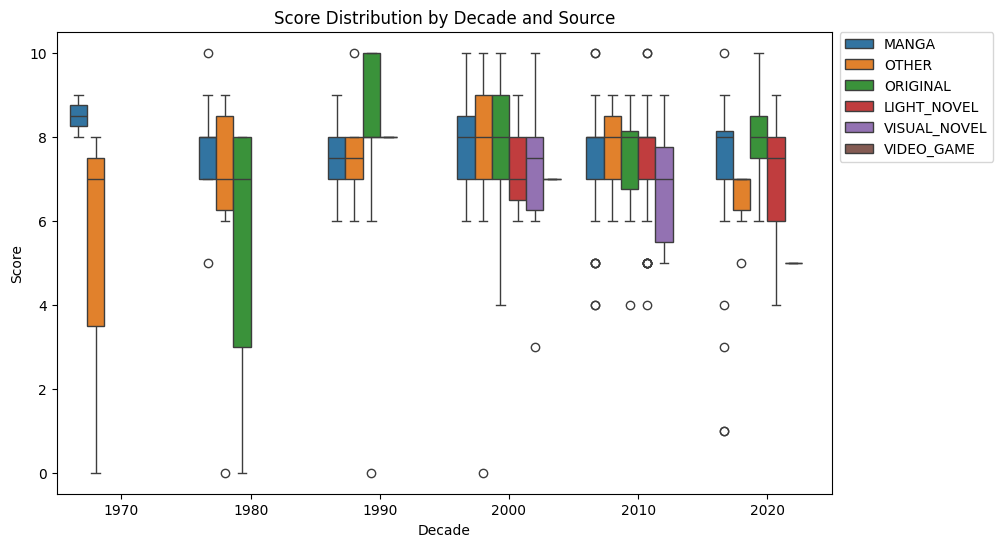

In [317]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='decade', y='score', hue='source')
plt.xlabel('Decade')
plt.ylabel('Score')
plt.title('Score Distribution by Decade and Source')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)